In [117]:
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter

## Problem 4

In [118]:
# helper functions

def is_sorted(A):
    for i in range(0,len(A)-2):
        if A[i] > A[i+1]:
            return False
    return True

def check_validity(func):
    rng = np.random.default_rng()
    for i in range(100,400,10):
        ints = rng.integers(0,1000,i)
        if not is_sorted(func(list(ints))):
            return False
    return True

def compare_worst(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Worst Runtimes comparison. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            worst_time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if worst_time < (end-start): worst_time = (end-start)
            times.append(worst_time)
        
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

def compare_average(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Average Runtimes comparison. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                time += (end-start)
            times.append(time/trials)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

def make_sorta_sorted(n, mess_factor):
    rng = np.random.default_rng()
    A = sorted(rng.integers(1,1000,n))
    percent = int((mess_factor * n) // 2)
    for i in range(percent):
        j_1, j_2 = rng.integers(0,n,2)
        A[j_1], A[j_2] = A[j_2], A[j_1]
    return A

def compare_adaptive(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Best Runtimes comparison on partially sorted lists. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            best_time = 100
            for i in range(0,trials):
                int_list = make_sorta_sorted(size,0.1)
                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if (end-start) < best_time: best_time = (end-start)
            times.append(best_time)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

In [119]:
#insertion sort for comparison
def insertionsort(A):
    for i in range(0,len(A)-1):
        if A[i] > A[i+1]:
            insert = i+1
            for j in range(0,i+1):
                if A[insert] < A[i-j]:
                    A[insert],A[i-j] = A[i-j],A[insert]
                    insert = i-j
    return A

#merge sort implementation
def merge(left,right):
    merge_list = []
    left_index, right_index = 0, 0
    while(left_index < len(left) and right_index < len(right)):
        if left[left_index] > right[right_index]:
            merge_list.append(right[right_index])
            right_index+=1
        else:
            merge_list.append(left[left_index])
            left_index+=1
    if left_index == len(left):
        merge_list += right[right_index:]
    elif right_index == len(right):
        merge_list += left[left_index:]
    return merge_list

def mergesort(A):
    if len(A) == 1:
        return A
    mid = len(A)//2
    left = mergesort(A[0:mid])
    right = mergesort(A[mid:])
    return merge(left,right)

def partition(A,p,r):
    pivot = A[r]
    i = p-1
    for j in range(p,r):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

#quick sort implementaion
def quicksort(A,start = 0,stop = -1):
    if stop == -1:
        stop = len(A)-1
    if start < stop:
        q = partition(A,start,stop)
        quicksort(A,start,q-1)
        quicksort(A,q+1,stop)
    return A

In [120]:
print("Mergesort works") if check_validity(mergesort) else print("Mergesort failed")
print("Quicksort works") if check_validity(quicksort) else print("Quicksort failed")

Mergesort works
Quicksort works


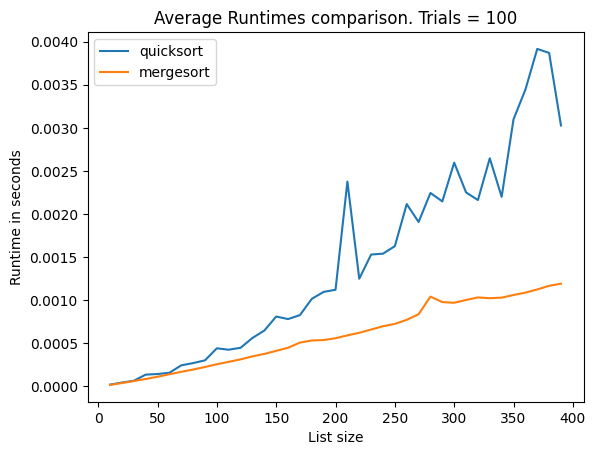

In [121]:
compare_average(quicksort,mergesort)

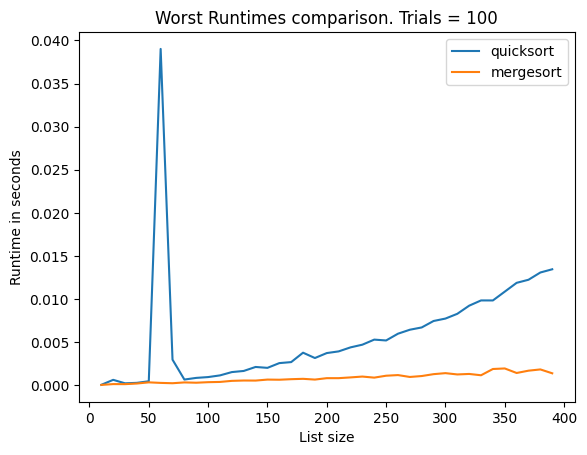

In [122]:
compare_worst(quicksort,mergesort)

### (b)
Based off of the average and worst run time comparisons, mergesort appears to be performing better, as it has lower run times for almost all list sizes, and quicksort appears to be a bit more volotile with occasional very high peaks.

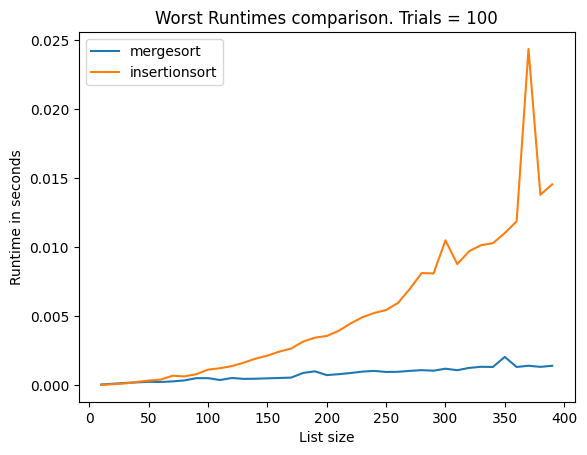

In [123]:
compare_worst(mergesort,insertionsort)

### (c)
As expected, insertion sort performs worse than mergesort. This makes sense because the theoretical speed of mergesort is better than insertionsort.

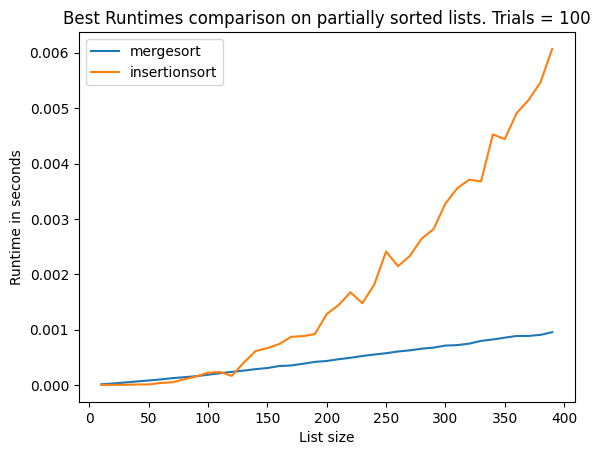

In [124]:
compare_adaptive(mergesort,insertionsort)

### (d)
On the partially sorted lists, insertion sort still performs worse on larger list sizes. However, its overall speeds are significantly faster than what was seen in the last part.

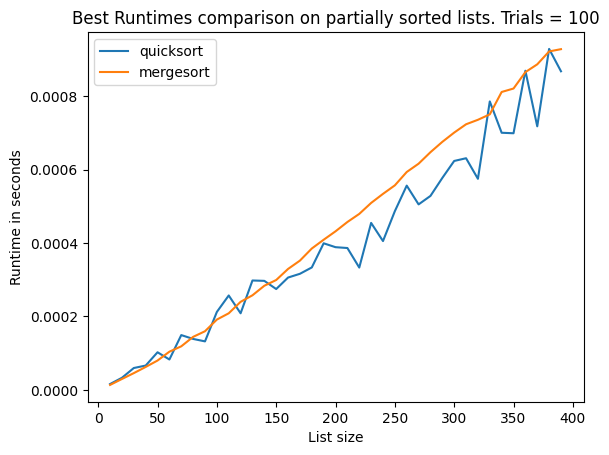

In [125]:
compare_adaptive(quicksort,mergesort)

### (e)
Both mergesort and quicksort perform very similarly on the partially sorted lists. The general shape of their curves still appears to be $O(nlog(n))$ which makes sense because this is the best case run time for both algorithms and they cannot really get much better. They are therefore not adaptive.

## Problem 5

In [126]:
#brute force solution
def num_of_sqrs_1(A):
    count = 0
    for i in range(len(A)):
        for j in range(len(A)):
            if (A[i] == A[j]**2) and (i != j):
                count += 1
    return count

The run time of the brute force solution would be $O(n^2)$.

In [127]:
print(num_of_sqrs_1([2,4,9,16,3]))

3


In [128]:
#improved solution using mergesort first
def num_of_sqrs_2(A):
    A = mergesort(A)
    count = 0
    d={}
    for i in A:
        if i in d:
            count +=1
        d[i**2] = 0
    return count



This solution has an improved runtime of $O(nlog(n))$ because the runtime of mergesort is $O(nlog(n))$ and then solving the problem is $O(n)$ after becuase you only have to make a single pass through the list.

In [129]:
print(num_of_sqrs_2([2,4,9,16,3]))

3


## Problem 6

In [130]:
#brute force solution
def majority_element_1(A):
    for item in A:
        count = 0
        for item2 in A:
            if item == item2:
                count+=1
        if count > len(A)//2:
            return item
    return -1

#divide and conquer solution
def majority_element_2(A):
    if len(A) == 1:
        return A[0]
    mid = len(A)//2
    right_majority = majority_element_2(A[:mid])
    left_majority = majority_element_2(A[mid:])
    if right_majority != -1:
        count = 0
        for item in A:
            if item == right_majority: count +=1
        if count > len(A)//2: return right_majority
    if left_majority != -1:
        count = 0
        for item in A:
            if item == left_majority: count +=1
        if count > len(A)//2: return left_majority
    return -1

def compare_with_theory(algo,theory, resolution = 1, max_size = 500):
    rng = np.random.default_rng()
    times = []
    for size in range(10,max_size,10):
        time = 0
        for _ in range(0,resolution):
            int_list = rng.integers(0,1000,size)

            start = perf_counter()
            algo(list(int_list))
            end = perf_counter()

            time += (end-start)
        times.append(time/resolution)
    
    x_axis = range(10,max_size,10)
    theo_vals = [theory(i) for i in x_axis]
    fix, ax = plt.subplots(1,2,figsize=(10,4)) # this creates a 1x2 grid of Axes
    ax[0].set_title(f"{str(algo.__name__)} runtimes")
    ax[0].set_xlabel("Array size")
    ax[0].set_ylabel("Runtime in seconds")
    ax[0].plot(x_axis, times)
    ax[1].set_title("Theoretical big-O function:")
    ax[1].set_xlabel(f"Input size n")
    ax[1].plot(x_axis, theo_vals)
    plt.tight_layout()
    plt.show()

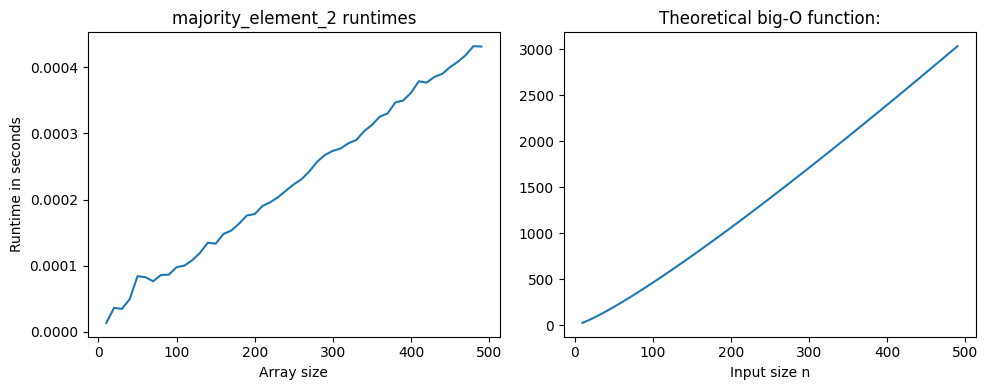

In [132]:
compare_with_theory(majority_element_2,lambda x: x*np.log(x),resolution=50)

### (a)
The runtime of the brute force solution is $O(n^2)$ because you make a pass through the list for every item in the list.

### (b)
The idea between the divide and conquer algorithm is that an element can only be a majority element if after you split the array in half, it is also the majority element of one of those halves. This means that you can divide the array into smaller subarrays until they are of length 1. The majority element of an array of length 1 is simply the single element so it gets returned. Now as you put the arrays back together you only have two possibilities of majority elements to check. Checking if an element is a majority element is an $O(n)$ task. You have to perform this at most twice for each call of the function and $2*O(n) = O(n)$. We then have a solution with the recurrance relation: $T(n) = 2T(\frac{n}{2}) + O(n)$. Using the master theorem, we have that $a=2$, $b=2$, and $d=1$. This falls under case two of the master theorem because $log_2(2) = 1 =d$. Therefore, the theoretical runtime is $O(n^dlog(n)) = O(nlog(n))$. We can see by looking at the compare with theory graph, that the runtimes of the function align closely with the theoretical curve for $O(nlog(n))$.

### (c)
